In [ ]:
# qsn :1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import house_sales_data as hsd

In [ ]:
## Sacramento house price data; load
data = house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
# price = ...
# area = ...
# beds = ...

In [29]:
data = hsd.house_sales_data()
price = data['price']
area = data["area"]
beds = data["beds"]
print(data.keys())

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [ ]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(iters)
    # now complete ...
    pass


In [34]:
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)

    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            costs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= learning_rate * grad
    return theta, costs

In [17]:
def normalize_data(X, y, normalize_cols):
    """ Normalize y and specified columns of X in place. """
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y

X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
ranges = normalize_data(X, y, [True, True, False])

In [31]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# call gradient descent and fine-tune your learning rate

In [86]:
theta,costs=gradient_descent(X_train,y_train,1500,0.1)
theta

array([ 0.81670961, -0.0804967 ,  0.08007509])

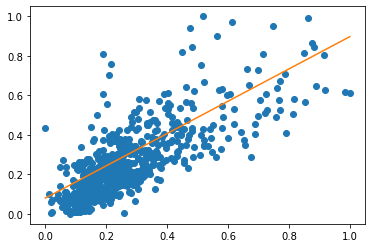

In [87]:
def f(x):
    return theta[2] + (theta[0]*x) #+ (theta[2]*(x**2)) #+ (theta[3]*(x**3)) + (theta[4]*(x**4))+(theta[5]*(x**5))

m=np.linspace(0,1,100)

f_value=[]
for i in np.linspace(0,1,100):
    f_value.append(f(i))
    
    
plt.plot(X_train[:,0],y_train,"o")
plt.plot(m,f_value)

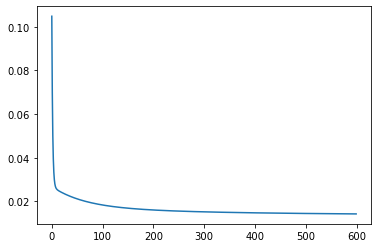

In [89]:
plt.plot(costs[:600])

In [ ]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

In [91]:
def evaluation_metrix(a,b):
       return np.mean(np.square(a-b)) 

In [127]:
# using 500 iter and L.R= 0.1
theta_500 ,costs=gradient_descent(X_train,y_train,500,0.1)
theta_500

array([ 0.81670961, -0.0804967 ,  0.08007509])

In [128]:

evaluation_from_GD_500=evaluation_metrix(X_test@theta_500,y_test)
evaluation_from_GD_500

0.013868973665137981

In [129]:
# using 2000 iter and L.R= 0.1
theta_2000 ,costs=gradient_descent(X_train,y_train,2000,0.1)
theta_2000

array([ 0.81670961, -0.0804967 ,  0.08007509])

In [136]:
evaluation_from_GD_2000=evaluation_metrix(X_test@theta_2000,y_test)
evaluation_from_GD_2000

0.01260250346740255

In [137]:
# [ ALART]    This has taken too mush time to run as 50000 iteratins used
# using 5000 iter and L.R= 0.2

#theta_50000 ,costs=gradient_descent(X_train,y_train,50000,0.2)
theta_50000

array([ 0.85847455, -0.12666022,  0.0892609 ])

In [138]:
evaluation_from_GD_50000=evaluation_metrix(X_test@theta_50000,y_test)
evaluation_from_GD_50000

0.012602503305118893

In [40]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [105]:
# Create linear regression object
lin_model= LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [106]:
lin_model.coef_

array([ 0.85847455, -0.12666022,  0.        ])

In [96]:
lin_model.intercept_

0.08926090234653963

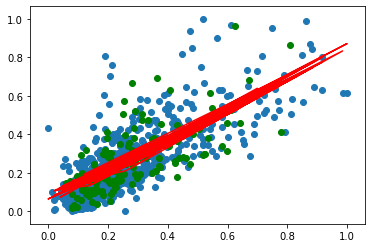

In [103]:
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_test[:,0], y_test, color='green')
plt.plot(X_train[:,0], lin_model.predict(X_train),color='red')

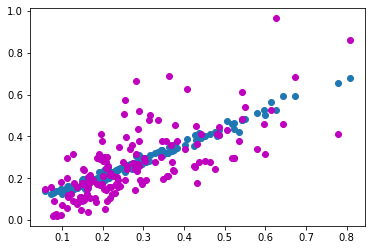

In [155]:
plt.plot (X_test[:,0], lin_model.predict(X_test),"o")
plt.plot(X_test[:,0],y_test,"mo")

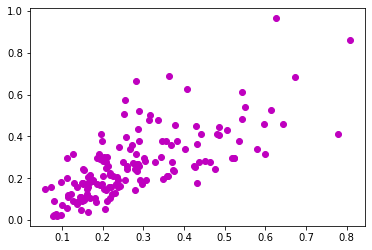

In [148]:
plt.plot(X_test[:,0],y_test,"mo")

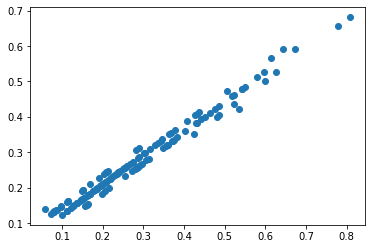

In [154]:
plt.plot (X_test[:,0], lin_model.predict(X_test),"o")   # this is not  a straight line (perhaps)because we have made it affacted by other columns[bed] too

In [113]:
# Predict on test set and print evaluation metric
pred_y=lin_model.predict(X_test)
pred_y

array([0.33279794, 0.19847744, 0.46143228, 0.28216527, 0.26391927,
       0.13461642, 0.47808176, 0.16222921, 0.56476599, 0.18912636,
       0.25253123, 0.13416027, 0.21603922, 0.36291956, 0.2372502 ,
       0.24318015, 0.21079349, 0.35216861, 0.19461587, 0.25890162,
       0.14784477, 0.40420115, 0.28674249, 0.40006437, 0.23040795,
       0.20851274, 0.43701253, 0.24477667, 0.27305798, 0.25411204,
       0.19368786, 0.26141044, 0.14693247, 0.32619947, 0.17840683,
       0.31820113, 0.25618043, 0.38297445, 0.17110843, 0.24590134,
       0.15444324, 0.41034346, 0.25435583, 0.13736903, 0.47899406,
       0.29837432, 0.3360067 , 0.33576291, 0.26142615, 0.19187897,
       0.20668814, 0.18935443, 0.28423366, 0.35014736, 0.30546035,
       0.42240002, 0.43132637, 0.15537125, 0.13966549, 0.26165423,
       0.15651162, 0.23840628, 0.26802462, 0.17658223, 0.47262367,
       0.1503536 , 0.16268536, 0.18000336, 0.51160879, 0.41446452,
       0.14626396, 0.38732359, 0.32072567, 0.24296779, 0.33188

In [156]:
evaluation_from_SK=evaluation_metrix(pred_y,y_test)
evaluation_from_SK

0.012602503305118876

In [158]:
# How much does it differ by from your (GD) solution
evaluation_from_GD_50000 - evaluation_from_SK


# actually aftr 1000 iterations with L.R = 0.1 , the difference is too small


1.734723475976807e-17